In [1]:
import source.utilities as util
import source.loader as load
import source.analyzer as analyzer

Total Income: 10772.26
Income: category
INCOME    10745.26
OTHER        27.00
Name: transaction, dtype: float64
Total Expense: 10412.46
Expense: category
CREDIT CARD    -2708.90
EXPENSE         -515.73
PROPERTY       -6522.84
SUBSCRIPTION     -20.00
UTILITIES       -644.99
Name: transaction, dtype: float64
Category: category
CREDIT CARD     -26.02%
EXPENSE          -4.95%
PROPERTY        -62.64%
SUBSCRIPTION     -0.19%
UTILITIES        -6.19%
Name: transaction, dtype: object


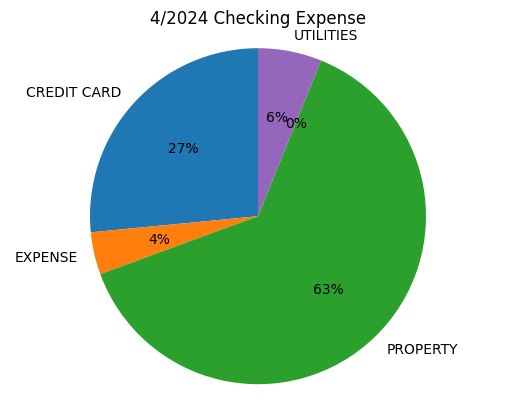

In [2]:
analyzer.analyzeChecking(4, 2024)

The file './input/credit/td/4_2024.csv' does not exist.
Total Expense: 1874.44
Expense: category
COMMUTE          73.00
DINING          168.06
GROCERY           5.00
HEALTH CARE     565.19
INCOME           66.46
OTHER            23.25
SERVICE           0.03
SHOPPING        841.50
SUBSCRIPTION     41.83
UTILITIES        90.12
Name: transaction, dtype: float64
Category: category
COMMUTE          3.89%
DINING           8.97%
GROCERY          0.27%
HEALTH CARE     30.15%
INCOME           3.55%
OTHER            1.24%
SERVICE           0.0%
SHOPPING        44.89%
SUBSCRIPTION     2.23%
UTILITIES        4.81%
Name: transaction, dtype: object


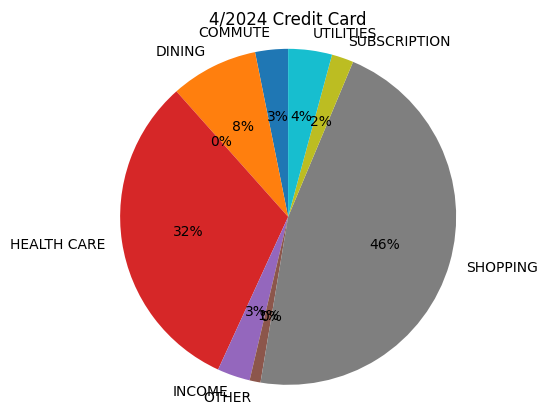

In [3]:
analyzer.analyzeCreditCard(4, 2024)

Expense: category
DINING        -285.60
GROCERY        -40.49
HEALTH CARE   -100.00
SERVICE        -40.60
SHOPPING      -177.88
UTILITIES      -25.00
Name: transaction, dtype: float64


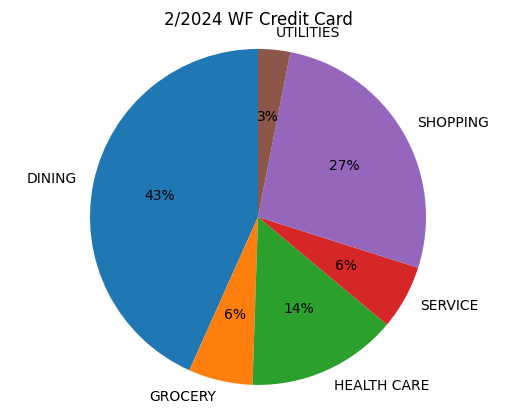

In [4]:
# Import Wells Fargo
wfDf = load.importWF('./input/credit/wf/3_2024.csv');
df = util.sanitizeDataframe(wfDf);

# making transactions to be positive
# df = filter_df_at_month(df)
util.exportDataframe(df, 'wf')

totalExpense = df.groupby('category')['transaction'].sum()
print(f'Expense: {totalExpense}')

util.plotDataframe(df, '2/2024 WF Credit Card')